In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
df = pd.read_csv("/content/soil.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [90]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [91]:
df.shape

(2200, 8)

In [92]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


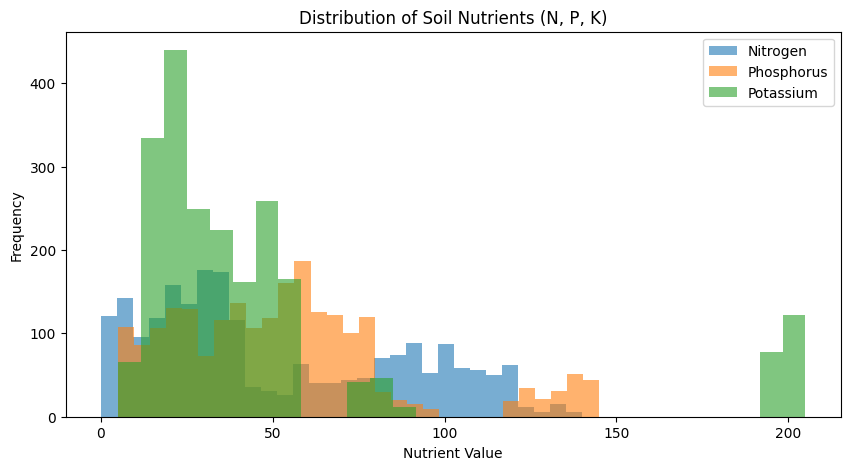

In [94]:
plt.figure(figsize=(10,5))
plt.hist(df['N'], bins=30, alpha=0.6, label='Nitrogen')
plt.hist(df['P'], bins=30, alpha=0.6, label='Phosphorus')
plt.hist(df['K'], bins=30, alpha=0.6, label='Potassium')
plt.xlabel("Nutrient Value")
plt.ylabel("Frequency")
plt.title("Distribution of Soil Nutrients (N, P, K)")
plt.legend()
plt.show()

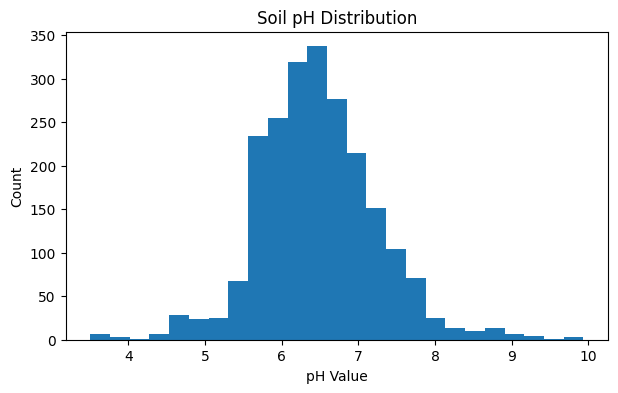

In [95]:
plt.figure(figsize=(7,4))
plt.hist(df['ph'], bins=25)
plt.xlabel("pH Value")
plt.ylabel("Count")
plt.title("Soil pH Distribution")
plt.show()

In [96]:
def check_fertility(row):
    if row['N'] > 50 and row['P'] > 40 and row['K'] > 40 and 5.5 <= row['ph'] <= 7.5:
        return 1
    else:
        return 0
df['fertile'] = df.apply(check_fertility, axis=1)

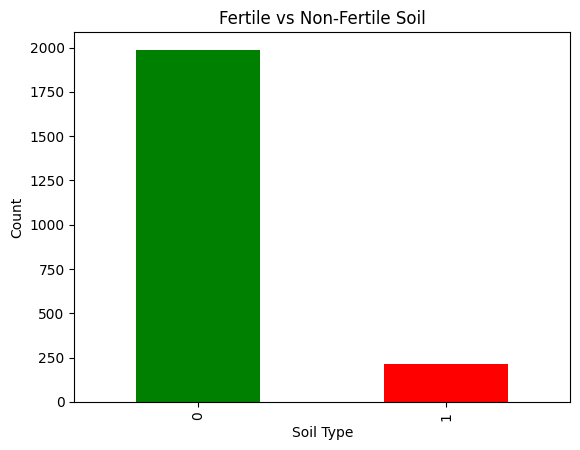

In [97]:
df['fertile'].value_counts().plot(kind='bar', color=['green','red'])
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.title("Fertile vs Non-Fertile Soil")
plt.show()

In [98]:
fertile_data = df[df['fertile'] == 1]

In [99]:
X = fertile_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = fertile_data['label']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [101]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
y_pred = model.predict(X_test)

In [103]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9534883720930233


In [104]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00         2
        jute       1.00      0.80      0.89        10
      papaya       1.00      1.00      1.00        11
        rice       0.67      1.00      0.80         4

    accuracy                           0.95        43
   macro avg       0.93      0.96      0.94        43
weighted avg       0.97      0.95      0.96        43



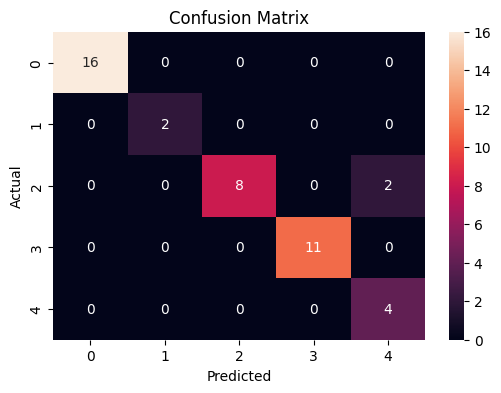

In [105]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

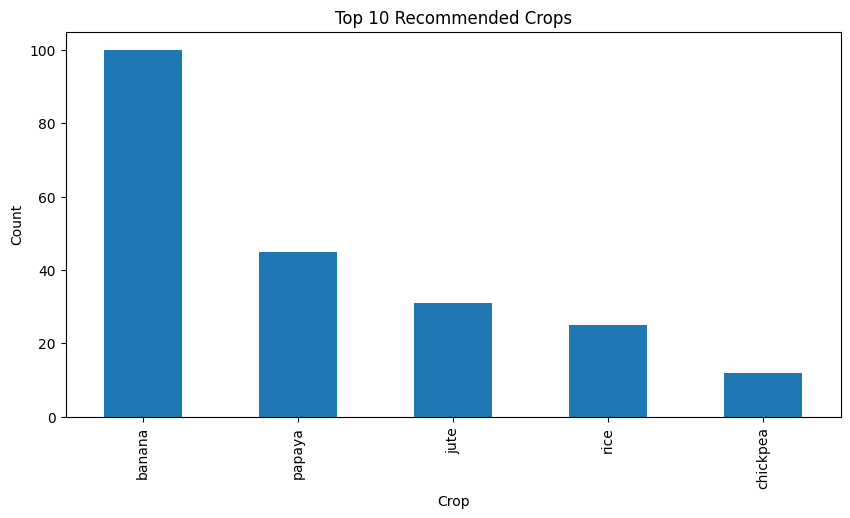

In [106]:
plt.figure(figsize=(10,5))
fertile_data['label'].value_counts().head(10).plot(kind='bar')
plt.xlabel("Crop")
plt.ylabel("Count")
plt.title("Top 10 Recommended Crops")
plt.show()

In [107]:
sample_soil = {
    'N': 90,
    'P': 40,
    'K': 40,
    'temperature': 25,
    'humidity': 80,
    'ph': 6.5,
    'rainfall': 200
}

sample_df = pd.DataFrame([sample_soil])

if check_fertility(sample_df.iloc[0]) == 1:
    predicted_crop = model.predict(sample_df)
    print("Soil is Fertile")
    print("Recommended Crop:", predicted_crop[0])
else:
    print("Soil is NOT Fertile")

Soil is NOT Fertile


In [108]:
sample_soil_fertile = {
    'N': 90,
    'P': 45,
    'K': 50,
    'temperature': 26,
    'humidity': 78,
    'ph': 6.8,
    'rainfall': 210
}
sample_df = pd.DataFrame([sample_soil_fertile])

if check_fertility(sample_df.iloc[0]) == 1:
    predicted_crop = model.predict(sample_df)
    print("Soil is Fertile")
    print("Recommended Crop:", predicted_crop[0])
else:
    print("Soil is NOT Fertile")


Soil is Fertile
Recommended Crop: jute
